In [90]:
import matplotlib.pyplot as plt
import pandas as pd

In [91]:
from principal_RBM_alpha_coherent import RBM
from read_save import lire_alpha_digit, afficher_alpha_digit_random

### Explo RBM

In [3]:
LIST_IDX_DATA = [5, 12, 21]
data = lire_alpha_digit(LIST_IDX_DATA)

In [4]:
data.shape

(117, 320)

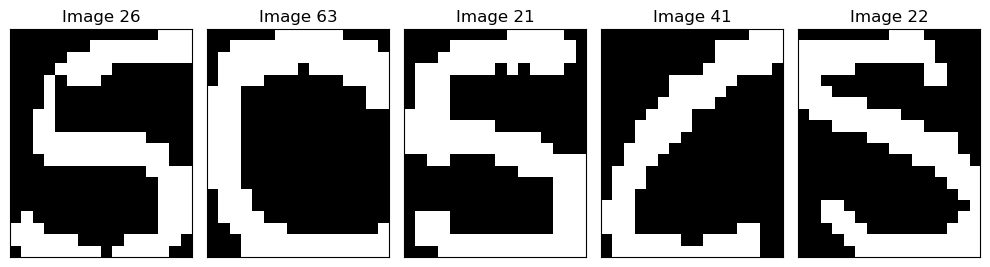

In [5]:
afficher_alpha_digit_random(data)

In [6]:
data.shape

(117, 320)

In [54]:
p = data.shape[1]
q = 50
learning_rate = 0.1
nb_epochs = 300
mini_batch_size = 32

In [26]:
RBM_model = RBM(p,q)

In [27]:
RBM_model.train_RBM(nb_epochs, learning_rate, mini_batch_size, data, verbose=True, step = 25)

Epoch 1/300, erreur de reconstruction: 0.17925015215203313
Epoch 26/300, erreur de reconstruction: 0.10969722573892307
Epoch 51/300, erreur de reconstruction: 0.08896352830179062
Epoch 76/300, erreur de reconstruction: 0.07616335674485908
Epoch 101/300, erreur de reconstruction: 0.06744225048359777
Epoch 126/300, erreur de reconstruction: 0.06102309905112909
Epoch 151/300, erreur de reconstruction: 0.055787487451950356
Epoch 176/300, erreur de reconstruction: 0.051682148876579265
Epoch 201/300, erreur de reconstruction: 0.048148222864700406
Epoch 226/300, erreur de reconstruction: 0.045173045065295854
Epoch 251/300, erreur de reconstruction: 0.04255936424669792
Epoch 276/300, erreur de reconstruction: 0.04024395944707353
Epoch 300/300, erreur de reconstruction: 0.038581493579733096


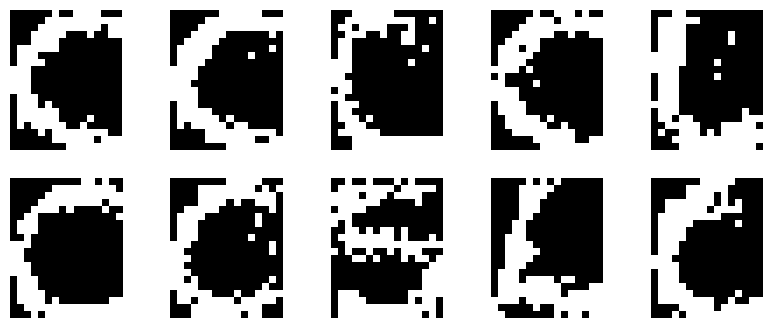

In [28]:
RBM_model.generer_image_RBM(nb_images = 10, nb_iter_gibbs=100)

Epoch1/300


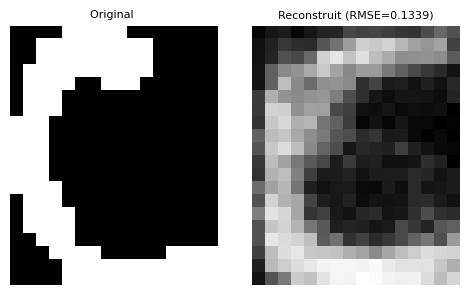

Epoch26/300


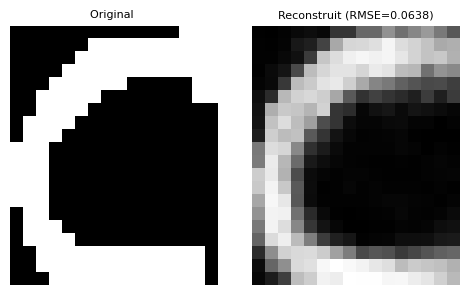

Epoch51/300


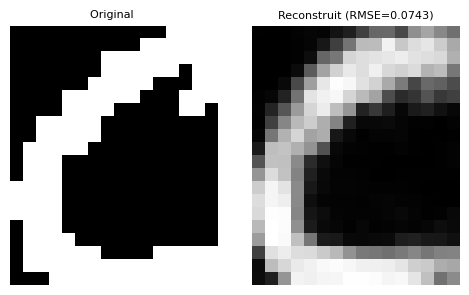

Epoch76/300


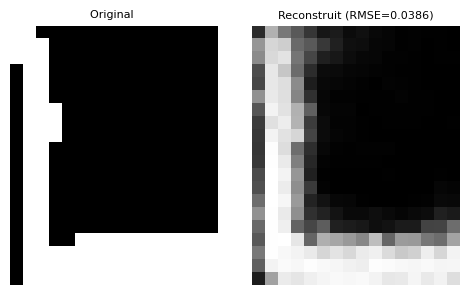

Epoch101/300


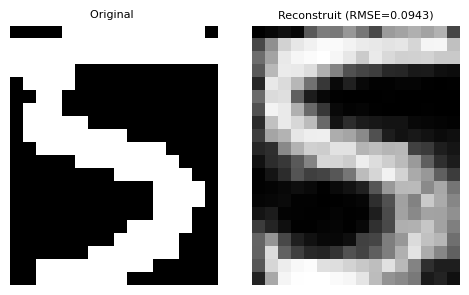

Epoch126/300


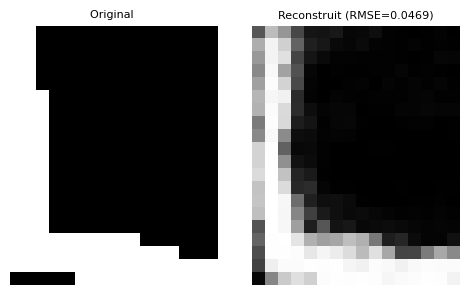

Epoch151/300


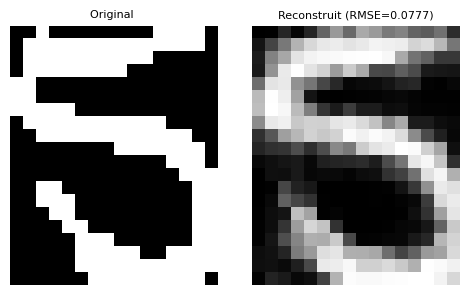

Epoch176/300


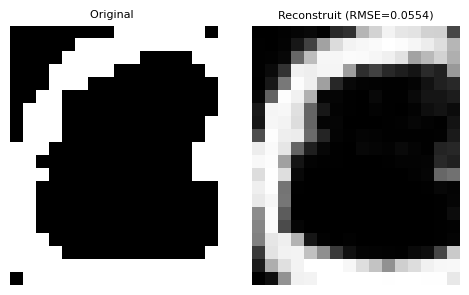

Epoch201/300


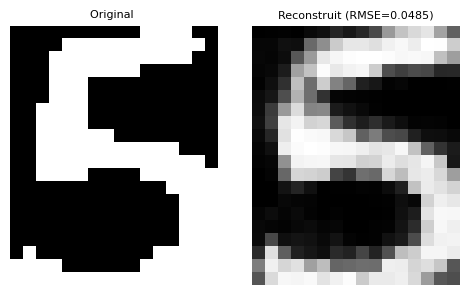

Epoch226/300


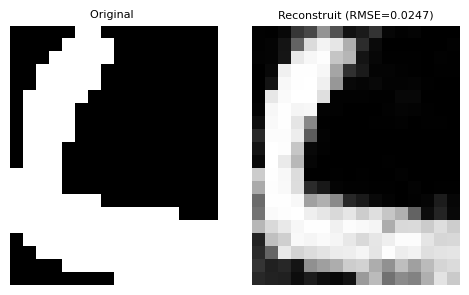

Epoch251/300


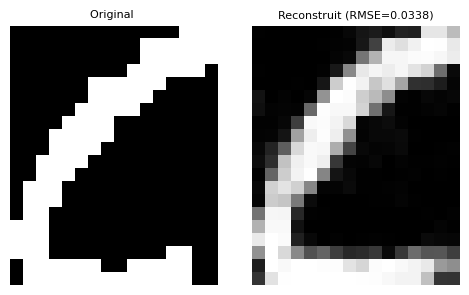

Epoch276/300


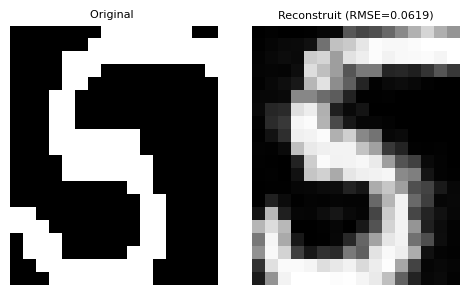

Epoch300/300


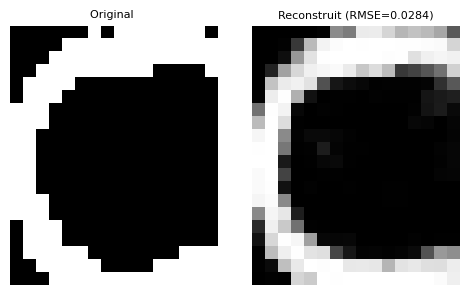

In [ ]:
RBM_model.afficher_image_RBM_vs_original()

## Analyse RBM
### Checker l'influence des paramètres :
- nb_epochs
- learning_rate
- mini_batch_size
- taille couche cachée : q (à vu d'oeil 10 moins bien que 1000)

#### Comment évolue la loss en fonction de l'avancée dans le training (epoch) ?

#### Influence du nombre d'epochs choisi : nb_epochs
On garde la même q (= 50) utilisée en début de test pour notre classe RBM. Pour pouvoir voir l'influence des autres paramètres

In [55]:
p = data.shape[1]
q = 50
learning_rate = 0.1
mini_batch_size = 32

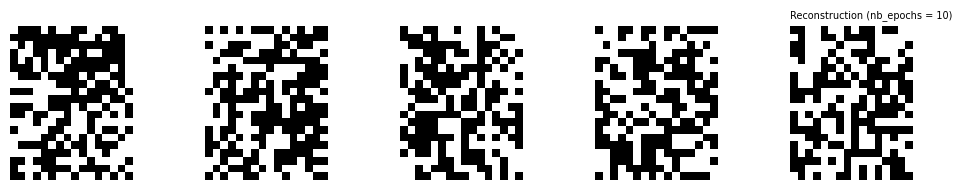

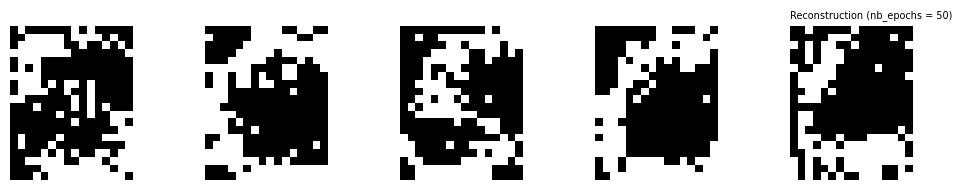

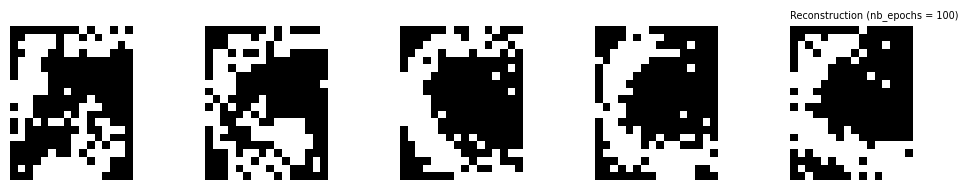

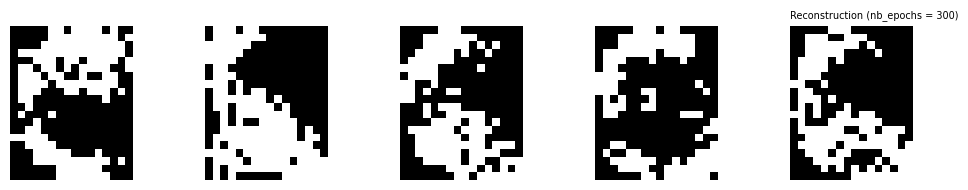

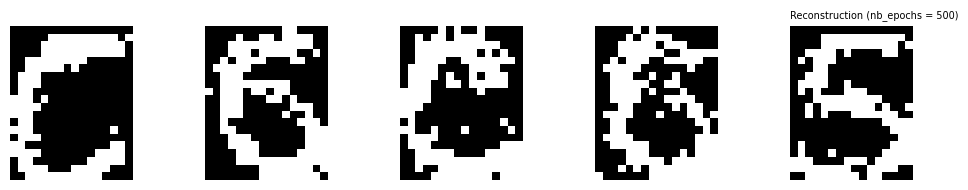

In [ ]:
nb_epochs = [10, 50, 100, 300, 500]
all_losses = []
for epoch in nb_epochs:
    RBM_model = RBM(p, q)
    RBM_model.train_RBM(epoch, learning_rate, mini_batch_size, data, verbose=False, step=25)
    all_losses.append(RBM_model.losses)
    RBM_model.analyse_RBM(nb_gibbs=10, nb_image=5, param_analysed="nb_epochs")

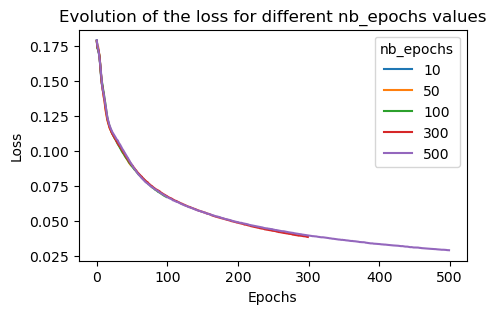

In [77]:
# Affichage des courbes de RMSE
plt.figure(figsize=(5, 3))
for i, loss in enumerate(all_losses):
    plt.plot(loss, label=f"{nb_epochs[i]}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(title="nb_epochs")
plt.title("Evolution of the loss for different nb_epochs values")
plt.show()

#### Influence du learning_rate

In [66]:
p = data.shape[1]
q = 50
nb_epochs = 300
mini_batch_size = 32

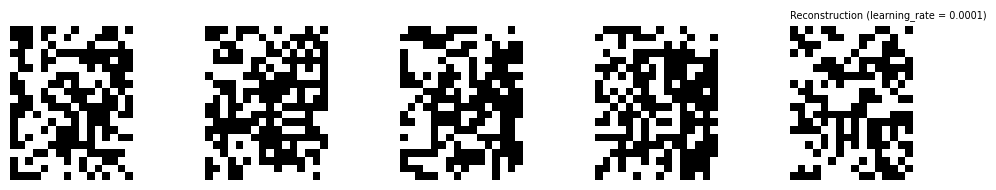

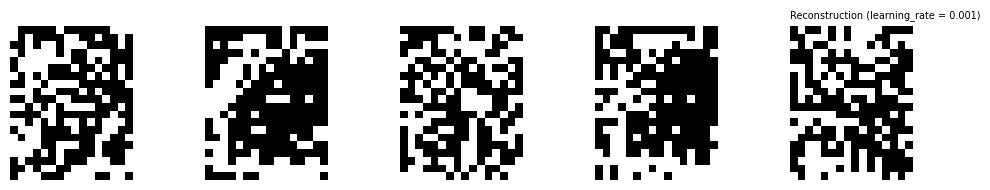

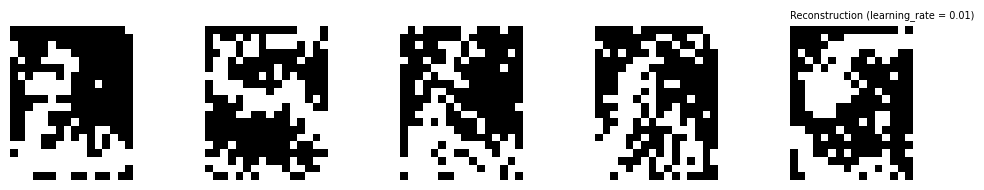

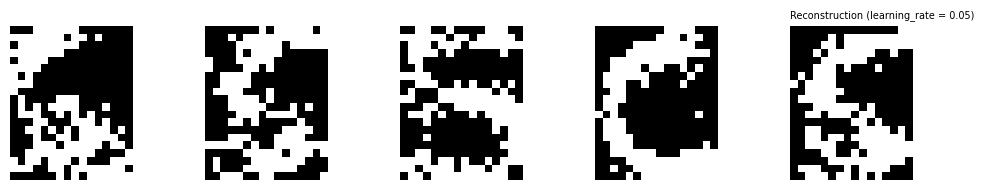

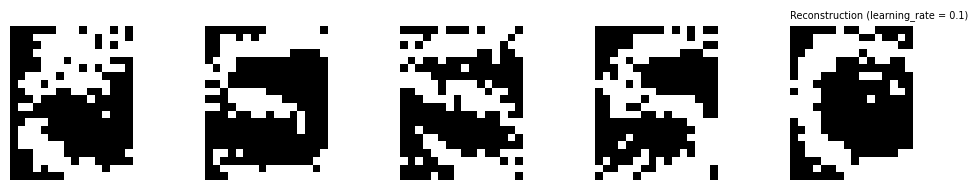

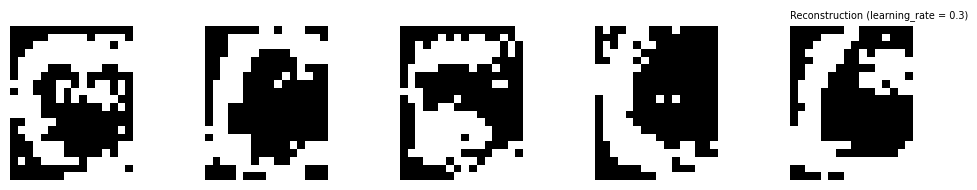

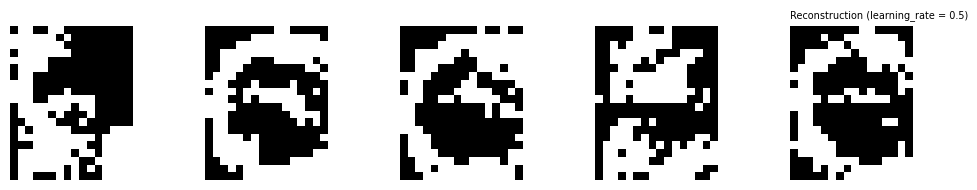

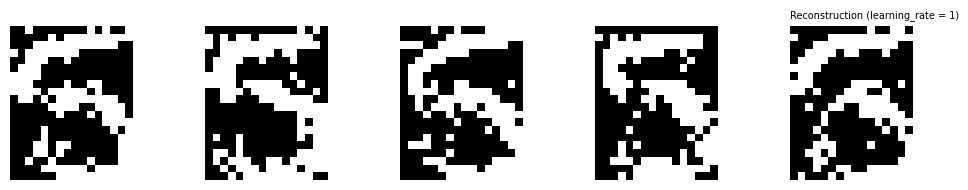

In [ ]:
learning_rates = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 1]
all_losses = []
for lr in learning_rates:
    RBM_model = RBM(p, q)
    RBM_model.train_RBM(nb_epochs, lr, mini_batch_size, data, verbose=False, step=25)        # détails -> verbose=True
    all_losses.append(RBM_model.losses)
    RBM_model.analyse_RBM(nb_gibbs=10, nb_image=5, param_analysed="learning_rate")

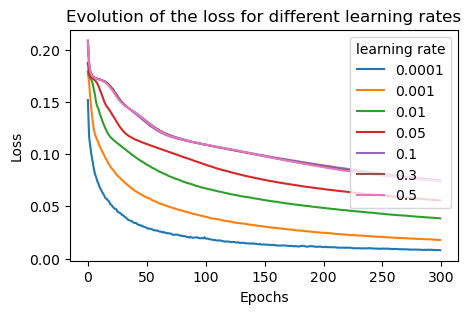

In [74]:
# Affichage des courbes de RMSE
plt.figure(figsize=(5, 3))
for i, loss in enumerate(all_losses):
    plt.plot(loss, label=f"{learning_rates[i]}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(title="learning rate")
plt.title("Evolution of the loss for different learning rates")
plt.show()

Si learning_rate (lr) trop faible ie < 0.01 alors modèle inefficace ; Mais si lr trop élevé, modèle n'apprends pas bien. Trouver un juste milieu -> lr = 0.1 ou 0.3 c'est suffisant pour l'instant

#### Influence du nombre de batchs choisi : mini_batch_size


In [69]:
p = data.shape[1]
q = 50
learning_rate = 0.1
nb_epochs = 300
mini_batch_size = 32

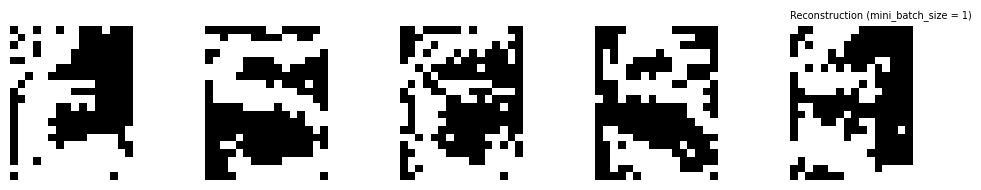

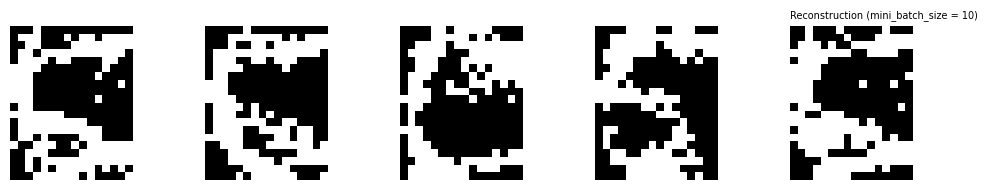

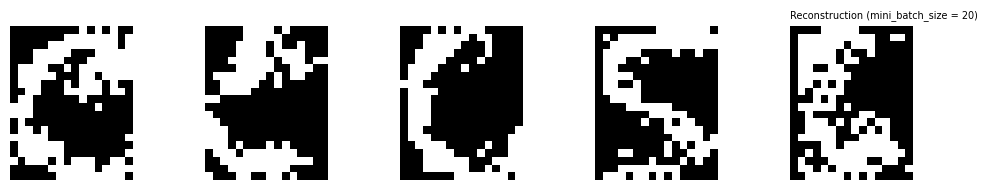

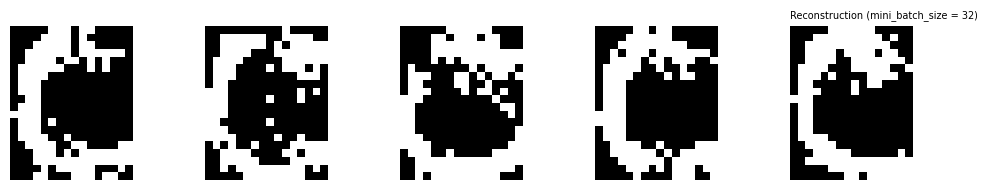

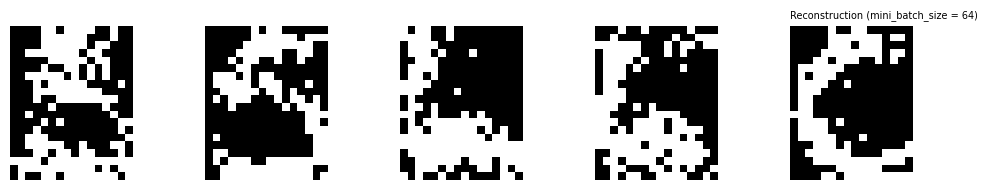

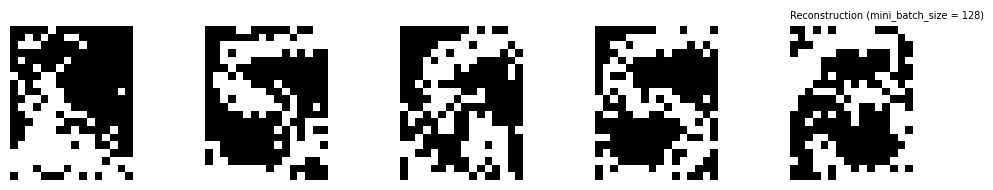

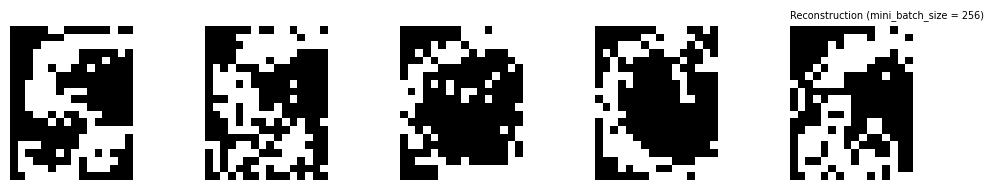

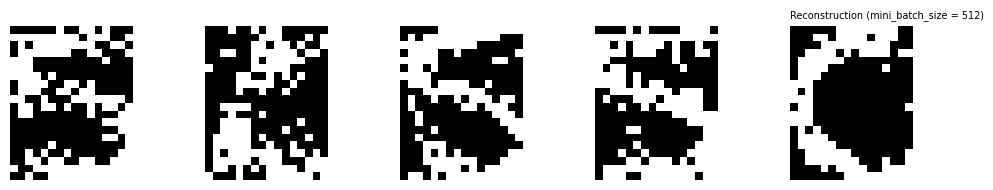

In [ ]:
mini_batch_sizes = [1, 10, 20, 32, 64, 128, 256, 512]
all_losses = []
for batch in mini_batch_sizes:
    RBM_model = RBM(p, q)
    RBM_model.train_RBM(nb_epochs, learning_rate, batch, data, verbose=False, step=25)        # détails -> verbose=True
    all_losses.append(RBM_model.losses)
    RBM_model.analyse_RBM(nb_gibbs=10, nb_image=5, param_analysed="mini_batch_size")

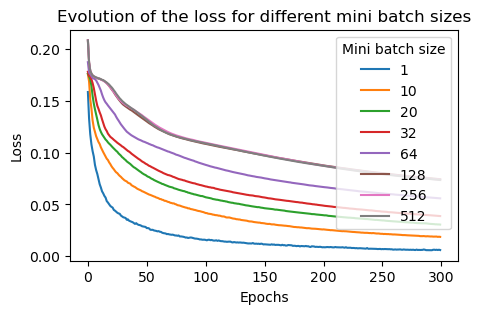

In [81]:
# Affichage des courbes de RMSE
plt.figure(figsize=(5, 3))
for i, loss in enumerate(all_losses):
    plt.plot(loss, label=f"{mini_batch_sizes[i]}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(title="Mini batch size")
plt.title("Evolution of the loss for different mini batch sizes")
plt.show()

Une valeur de mini_batch_size trop élevé (> 128), ralentirait la convergence de notre modèle. Jusqu'à là, on prenais mini_batch_size = 32, mais on pourrait prendre = 20 je pense.

### Influence de la taille de la couche cachée

In [88]:
p = data.shape[1]
learning_rate = 0.1
mini_batch_size = 32
nb_epochs = 300

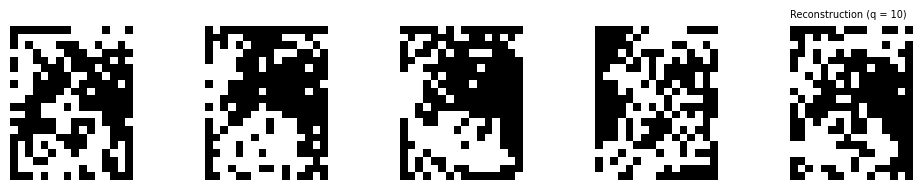

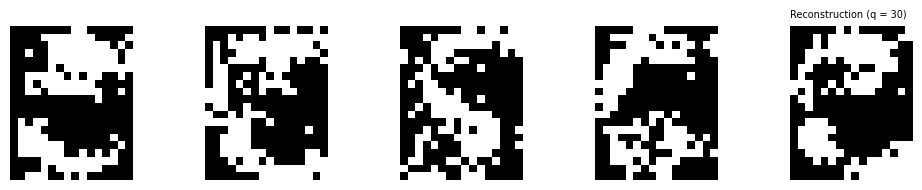

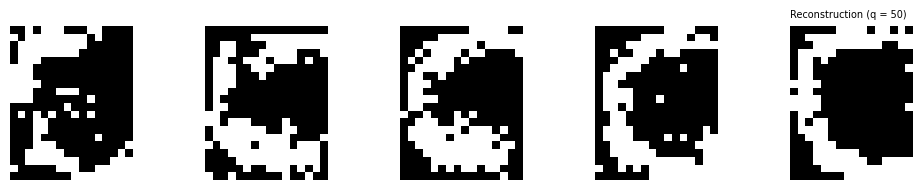

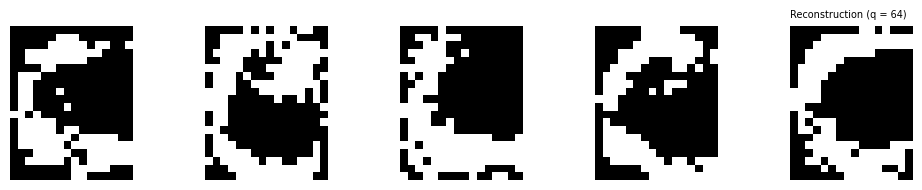

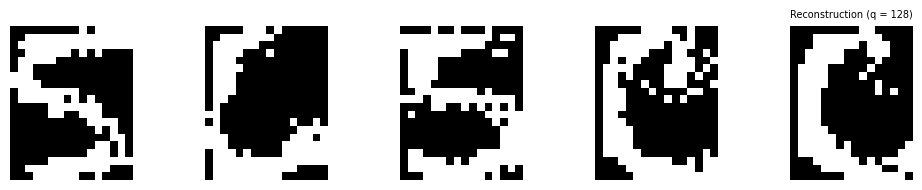

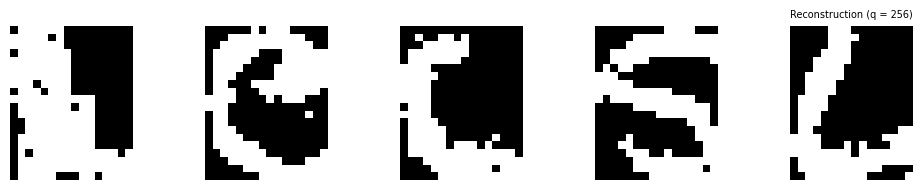

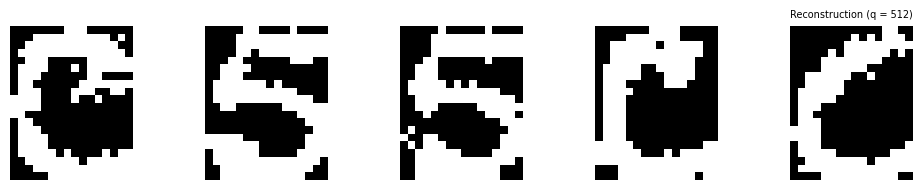

In [ ]:
Q = [10, 30, 50, 64, 128, 256, 512]
all_losses = []
for q in Q:
    RBM_model = RBM(p, q)
    RBM_model.train_RBM(nb_epochs, learning_rate, mini_batch_size, data, verbose=False, step=25)        # détails -> verbose=True
    all_losses.append(RBM_model.losses)
    RBM_model.analyse_RBM(nb_gibbs=10, nb_image=5, param_analysed="q")

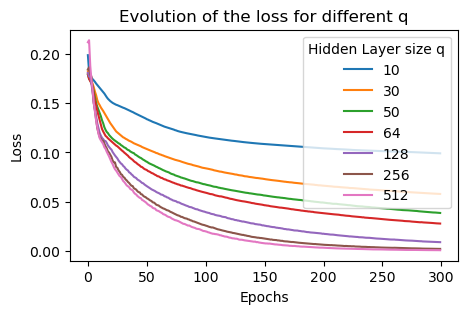

In [89]:
# Affichage des courbes de RMSE
plt.figure(figsize=(5, 3))
for i, loss in enumerate(all_losses):
    plt.plot(loss, label=f"{Q[i]}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(title="Hidden Layer size q")
plt.title("Evolution of the loss for different q")
plt.show()

C'est cohérent avec la littérature. En effet, on constate que la dimension de l'espace latent, c'est-à-dire le nombre d'états cachés, joue un rôle majeur dans la qualité de la génération de l'image.

### Explo DBN

In [3]:
from principal_DBN_alpha import DBN

In [4]:
LIST_IDX_DATA = [5, 12, 21]
data = lire_alpha_digit(LIST_IDX_DATA)

In [5]:
layer_sizes = [320, 200, 100, 150]
learning_rate = 0.01
nb_epochs = 300
mini_batch_size = 32

In [6]:
DBN_model = DBN(layer_sizes)

In [7]:
DBN_model.train_DBN(nb_epochs, learning_rate, mini_batch_size, data, verbose=True, step = 20)

Entraînement DBN avec 3 RBMs
Entraînement RBM 1 / 3
Epoch 1/300, erreur de reconstruction: 0.20174996775446444
Epoch 2/300, erreur de reconstruction: 0.18592548062521325
Epoch 3/300, erreur de reconstruction: 0.17999445067009828
Epoch 4/300, erreur de reconstruction: 0.17725365715022082
Epoch 5/300, erreur de reconstruction: 0.1762421434664394
Epoch 6/300, erreur de reconstruction: 0.1757076487883421
Epoch 7/300, erreur de reconstruction: 0.17530987687596034
Epoch 8/300, erreur de reconstruction: 0.1749608432463623
Epoch 9/300, erreur de reconstruction: 0.17476064280807024
Epoch 10/300, erreur de reconstruction: 0.1746242621941594
Epoch 11/300, erreur de reconstruction: 0.17452628662720057
Epoch 12/300, erreur de reconstruction: 0.1742897613230359
Epoch 13/300, erreur de reconstruction: 0.1741375362667905
Epoch 14/300, erreur de reconstruction: 0.1740064655342603
Epoch 15/300, erreur de reconstruction: 0.17387376141114974
Epoch 16/300, erreur de reconstruction: 0.17374389555389144
Epoc

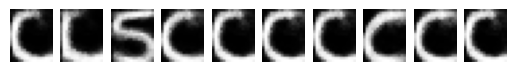

In [8]:
DBN_model.generer_image_DBN(nb_images = 10, nb_iter_gibbs=100)

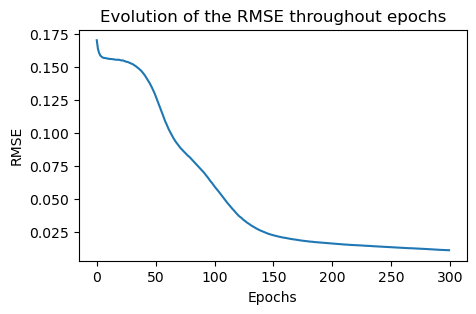

In [10]:
plt.figure(figsize=(5, 3))
plt.plot(DBN_model.losses[-1])
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Evolution of the RMSE throughout epochs')
plt.show()